<a href="https://colab.research.google.com/github/KaikyBN/Projeto-ProCode-Studio/blob/main/Entrega_1_Explora%C3%A7%C3%A3o_de_Dados_e_Pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

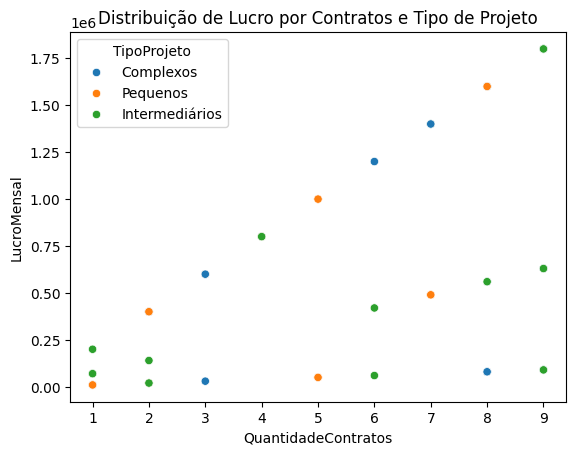

Erro quadrático médio (MSE): 40212925364.07
Acurácia da classificação: 0.47
Relatório de Classificação:
                precision    recall  f1-score   support

     Complexos       0.71      0.83      0.77         6
Intermediários       0.00      0.00      0.00         5
      Pequenos       0.33      0.50      0.40         4

      accuracy                           0.47        15
     macro avg       0.35      0.44      0.39        15
  weighted avg       0.37      0.47      0.41        15



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Expansão dos Dados
np.random.seed(42)
projetos = np.random.choice(["Pequenos", "Intermediários", "Complexos"], size=50)
quantidade_contratos = np.random.randint(1, 10, size=50)
valor_projeto = np.random.choice([10000, 70000, 200000], size=50)
lucro_mensal = quantidade_contratos * valor_projeto

# DataFrame
data = pd.DataFrame({
    "TipoProjeto": projetos,
    "QuantidadeContratos": quantidade_contratos,
    "ValorMedio": valor_projeto,
    "LucroMensal": lucro_mensal
})

# Visualização inicial
sns.scatterplot(data=data, x="QuantidadeContratos", y="LucroMensal", hue="TipoProjeto")
plt.title("Distribuição de Lucro por Contratos e Tipo de Projeto")
plt.show()

# Preparo dos dados
X = data[["QuantidadeContratos", "ValorMedio"]]
y_reg = data["LucroMensal"]
y_clf = data["TipoProjeto"]

# Divisão entre treino e teste (mantendo as classes balanceadas)
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.3, random_state=42, stratify=y_clf
)

# 1. Regressão Linear
reg_model = LinearRegression()
reg_model.fit(X_train, y_reg_train)
y_reg_pred = reg_model.predict(X_test)

# Avaliação da regressão
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Erro quadrático médio (MSE): {mse:.2f}")

# 2. Classificação com Random Forest
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train, y_clf_train)
y_clf_pred = clf_model.predict(X_test)

# Avaliação da classificação
acc = accuracy_score(y_clf_test, y_clf_pred)
print(f"Acurácia da classificação: {acc:.2f}")
print("Relatório de Classificação:")
print(classification_report(y_clf_test, y_clf_pred))

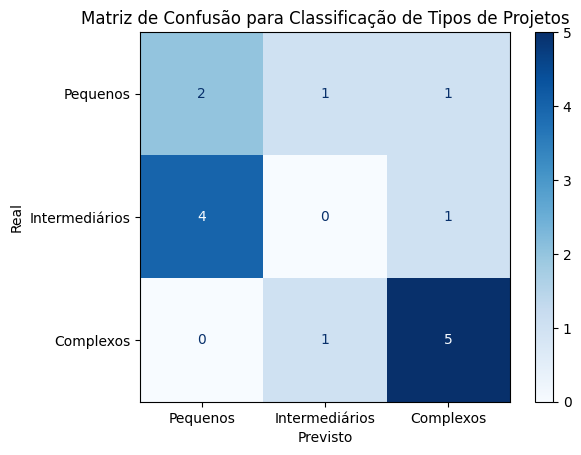

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusão
labels = ["Pequenos", "Intermediários", "Complexos"]
matriz_confusao = confusion_matrix(y_clf_test, y_clf_pred, labels=labels)

# Exibir matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão para Classificação de Tipos de Projetos")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
